<a href="https://colab.research.google.com/github/sura1717/Machine-Learning/blob/main/perceptron_trick_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **perceptron trick using sigmoid**

In [40]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [41]:
import matplotlib.pyplot as plt

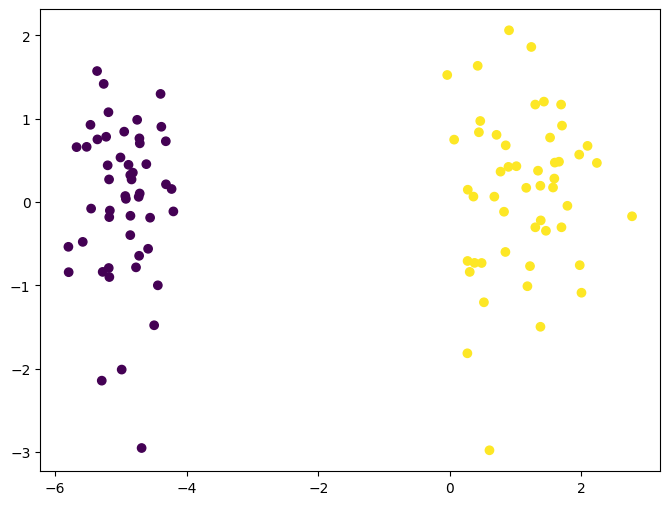

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)

In [43]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis=1)
    weight = np.ones(x.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(1,100)
        y_hat = step(np.dot(x[j],weight))
        weight = weight + lr * (y[j] - y_hat) * x[j]

    return weight[0],weight[1:]

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [45]:
def step(z):
    return 1 if z>0 else 0

In [46]:
intercept_, coef_ =perceptron(X,y)

In [47]:
print("intercept = ",intercept_)
print("coef =",coef_)

intercept =  1.3000000000000003
coef = [1.1134548  0.33857969]


In [48]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [49]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

(-3.0, 2.0)

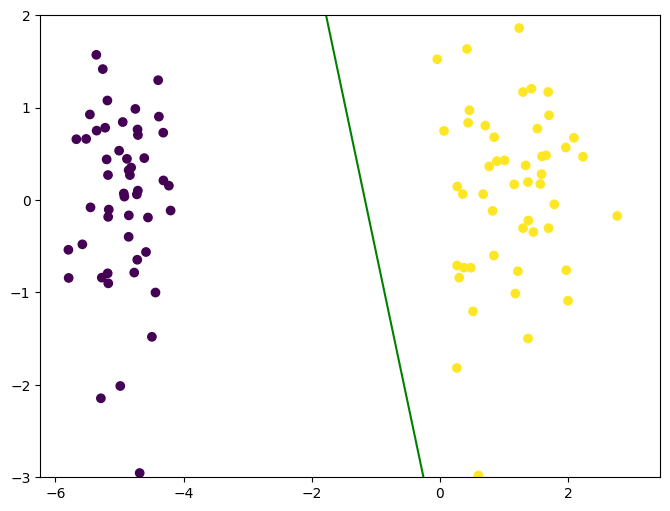

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,y_input,color="green")
plt.ylim(-3,2)

In [51]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [52]:
m2 = -(lor.coef_[0][0]/lor.coef_[0][1])
b2 = -(lor.intercept_[0]/lor.coef_[0][1])

In [53]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2 * x_input2 + b2

(-3.0, 2.0)

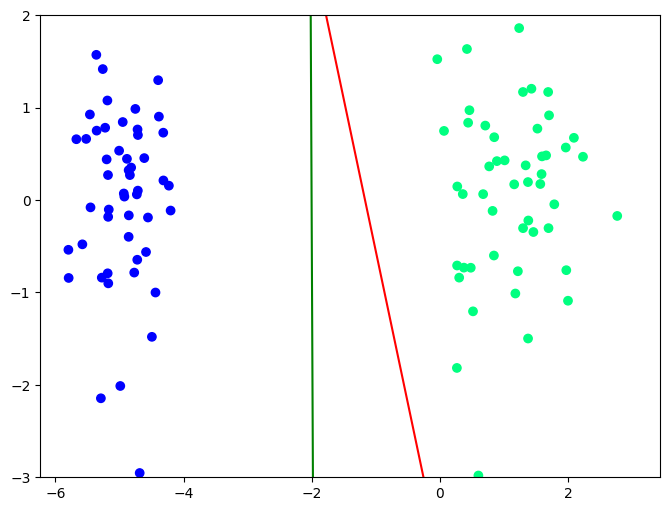

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.plot(x_input2,y_input2,color="green")
plt.plot(x_input,y_input,color="red")
plt.ylim(-3,2)

In [56]:
def perceptron2(x,y):
    x = np.insert(x,0,1,axis=1)
    weight = np.ones(x.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(1,100)
        y_hat = step(np.dot(x[j],weight))
        weight = weight + lr * (y[j] - y_hat) * x[j]

    return weight[0],weight[1:]

In [57]:
intercept_,coef_ = perceptron2(X,y)

In [58]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [59]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input + b

(-3.0, 2.0)

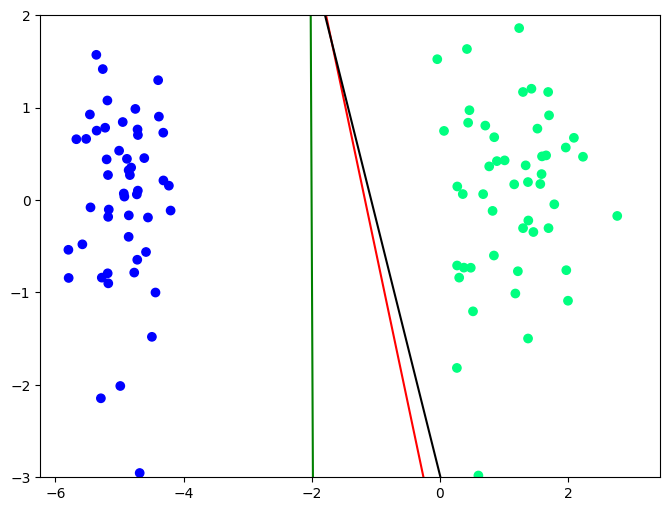

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.plot(x_input2,y_input2,color="green")
plt.plot(x_input,y_input,color="red")
plt.plot(x_input3,y_input3,color="black")
plt.ylim(-3,2)

In [63]:
def perceptron3(x,y):

    m = []
    b = []

    x = np.insert(x,0,1,axis=1)
    weight = np.ones(x.shape[1])
    lr = 0.1

    for i in range(200):
        j=np.random.randint(1,100)
        y_hat = step(np.dot(x[j],weight))
        weight = weight + lr * (y[j] - y_hat)*x[j]

        m.append(-(weight[1]/weight[2]))
        b.append(-(weight[0]/weight[2]))

    return m,b


In [64]:
m,b = perceptron3(X,y)

In [65]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [66]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>